#### Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [262]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [97]:
# import json files
logins_df = pd.read_json('logins.json')
logins_df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [89]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [98]:
#index the login_time column
logins_df.set_index('login_time', inplace=True)
# Adding a numeric column
logins_df ['login_count'] = 1
# resample in groups

In [9]:
result = logins_df.resample('15T', how='sum')

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [10]:
result.head(5)

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [29]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
login_count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [32]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
login_count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [45]:
logins_df = logins_df.reset_index()
logins_df.head()

,index,login_time,login_count
0,0,1970-01-01 20:13:18,1
1,1,1970-01-01 20:16:10,1
2,2,1970-01-01 20:16:37,1
3,3,1970-01-01 20:16:36,1
4,4,1970-01-01 20:26:21,1


In [35]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time     93142 non-null datetime64[ns]
login_count    93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [15]:
type(result)

pandas.core.frame.DataFrame

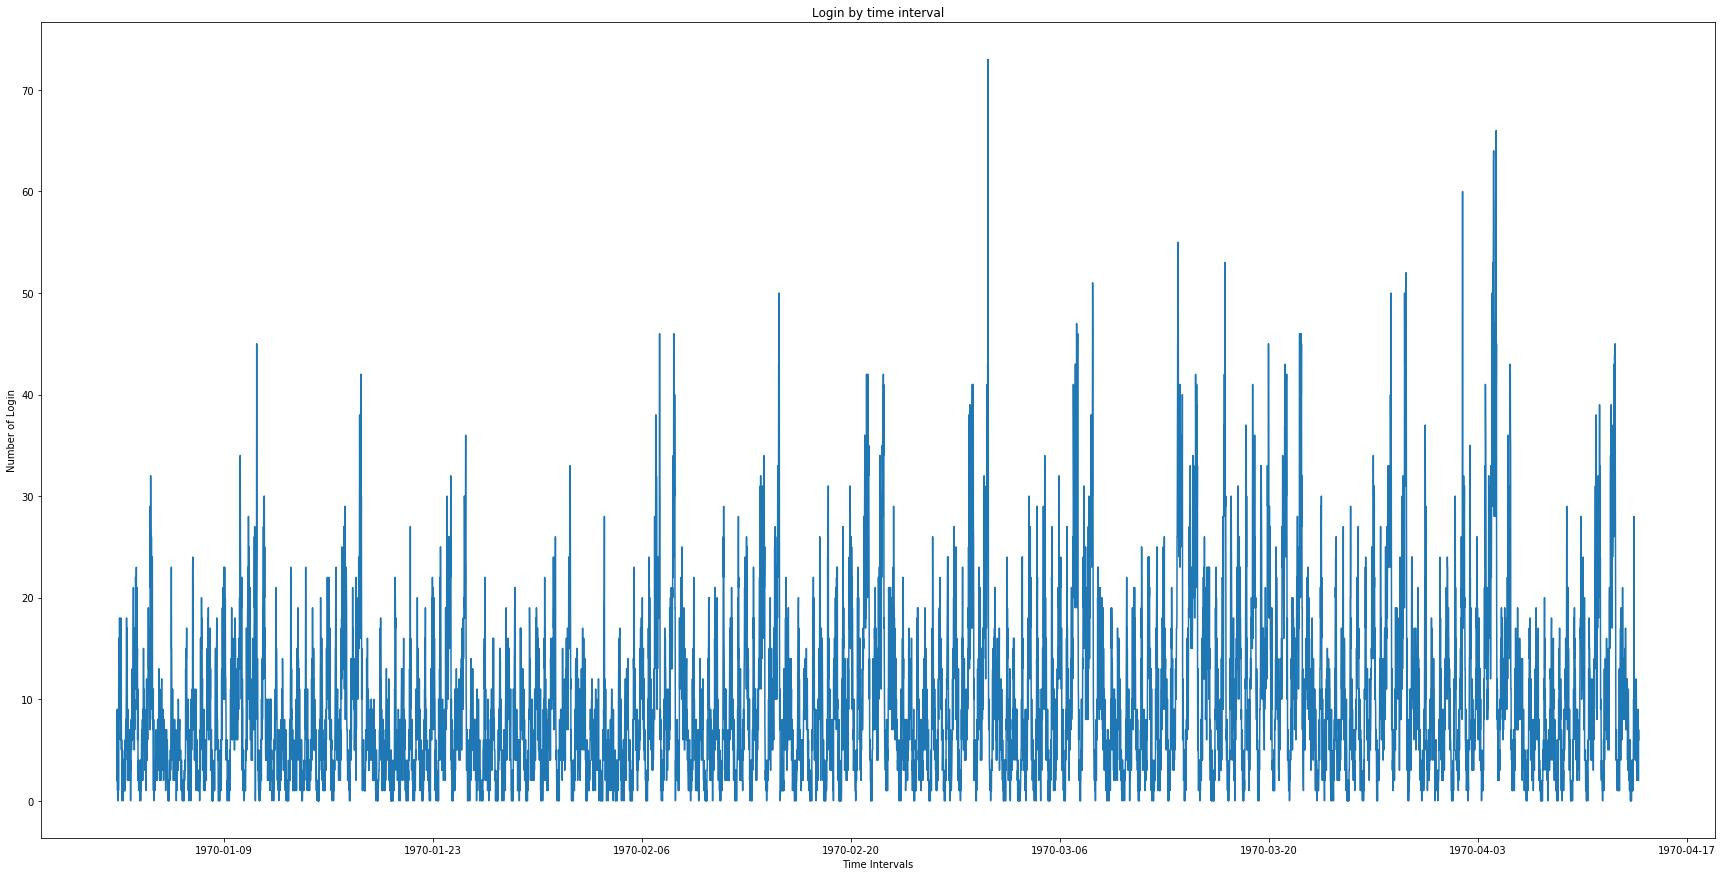

In [27]:
#plotting the result
logins_df = logins_df.reset_index()
fig, ax = plt.subplots(figsize = (30,15))
plt.xlabel('Time Intervals')
#plt.xticks(np.arange(20), result.index)
plt.ylabel('Number of Login')
plt.title('Login by time interval')
plt.plot(result.index, result.login_count)

##### Key Observations from the above graph
(1) We do see spikes at regular patterns in the data. This indicates that there was increase in logins at certain times. We will deep dive into that in some time.

(2) The number of logins are higher after March,1970. It may have been caused by new promotion/advertisements that bought in new uers. 

In [76]:
#Starting with the first observation, lets look at the pattern month by month and then week by week.
logins_df_jan = logins_df[(logins_df.login_time > '1970-01')
                           & (logins_df.login_time < '1970-02')]
logins_df_feb = logins_df[(logins_df.login_time > '1970-02')
                           & (logins_df.login_time < '1970-03')]
logins_df_mar = logins_df[(logins_df.login_time > '1970-03')
                           & (logins_df.login_time < '1970-04')]
logins_df_apr = logins_df[(logins_df.login_time > '1970-04')
                           & (logins_df.login_time < '1970-05')]


In [47]:
logins_df_jan = logins_df_jan.reset_index()

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


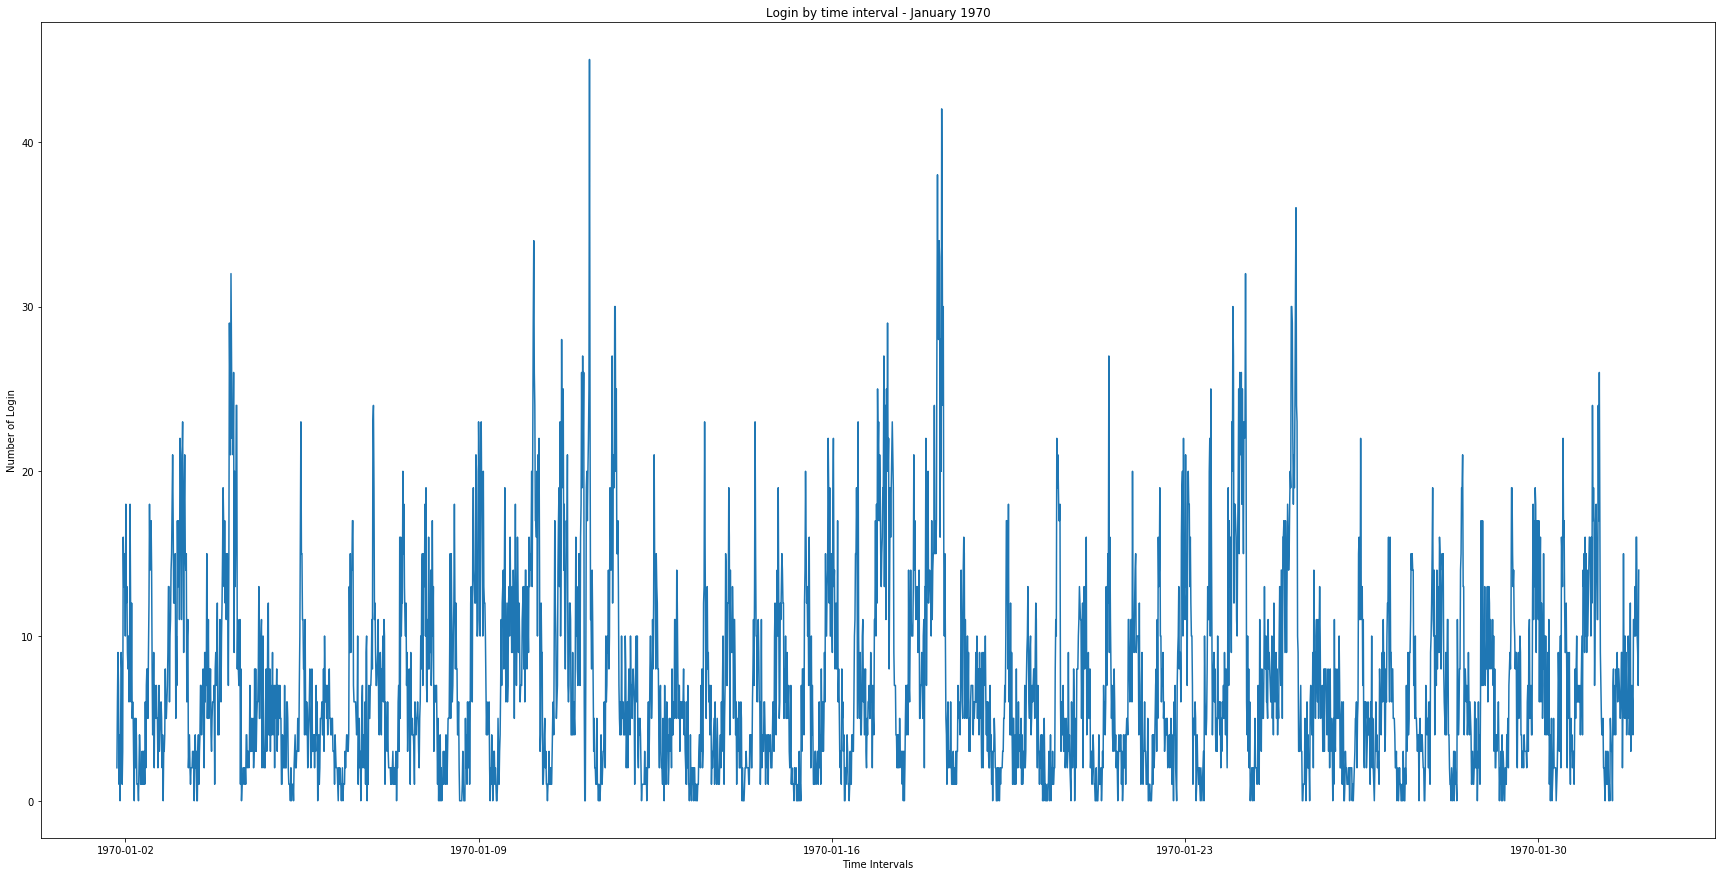

In [53]:
#Looking in jan data
#logins_df_jan.set_index('login_time', inplace=True)
logins_df_jan = logins_df_jan.resample('15T', how='sum')
fig, ax = plt.subplots(figsize = (30,15))
plt.xlabel('Time Intervals')
#plt.xticks(np.arange(20), result.index)
plt.ylabel('Number of Login')
plt.title('Login by time interval - January 1970')
plt.plot(logins_df_jan.index, logins_df_jan.login_count)


From the above graph, we can see that there is a higher spike in 2nd and 3rd week. Let see if we can see this trend n remaining months.

In [68]:
logins_df_feb = logins_df_feb.reset_index()
logins_df_feb.set_index('login_time', inplace=True)
logins_df_feb = logins_df_feb.resample('15T', how='sum')


/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


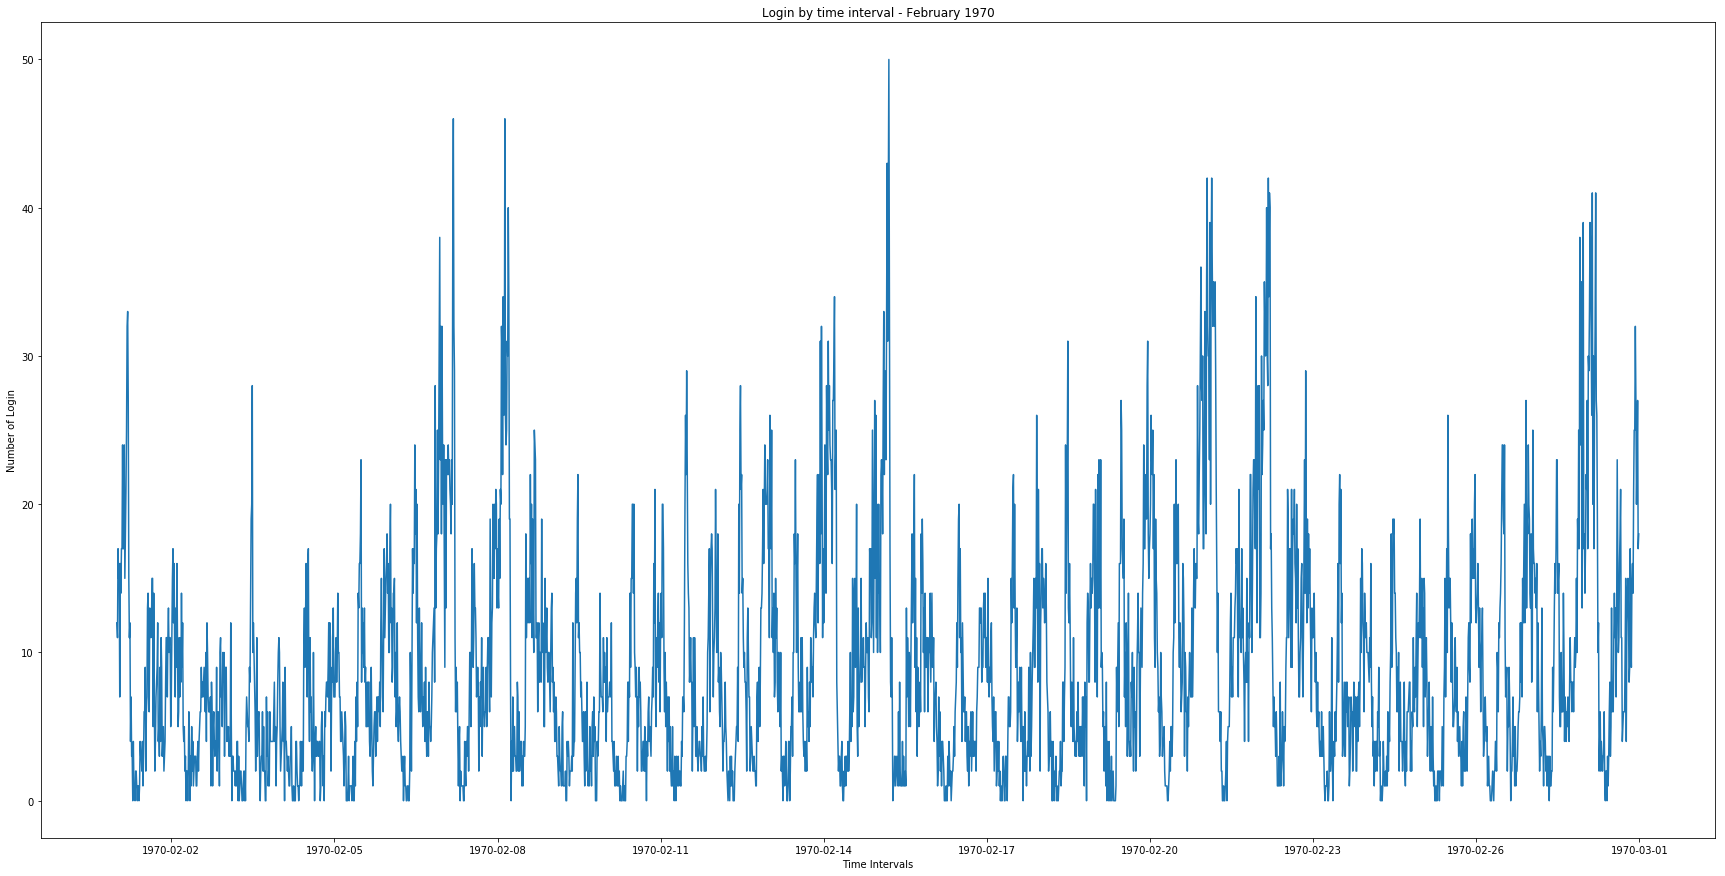

In [69]:
fig, ax = plt.subplots(figsize = (30,15))
plt.xlabel('Time Intervals')
#plt.xticks(np.arange(20), result.index)
plt.ylabel('Number of Login')
plt.title('Login by time interval - February 1970')
plt.plot(logins_df_feb.index, logins_df_feb.login_count)

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


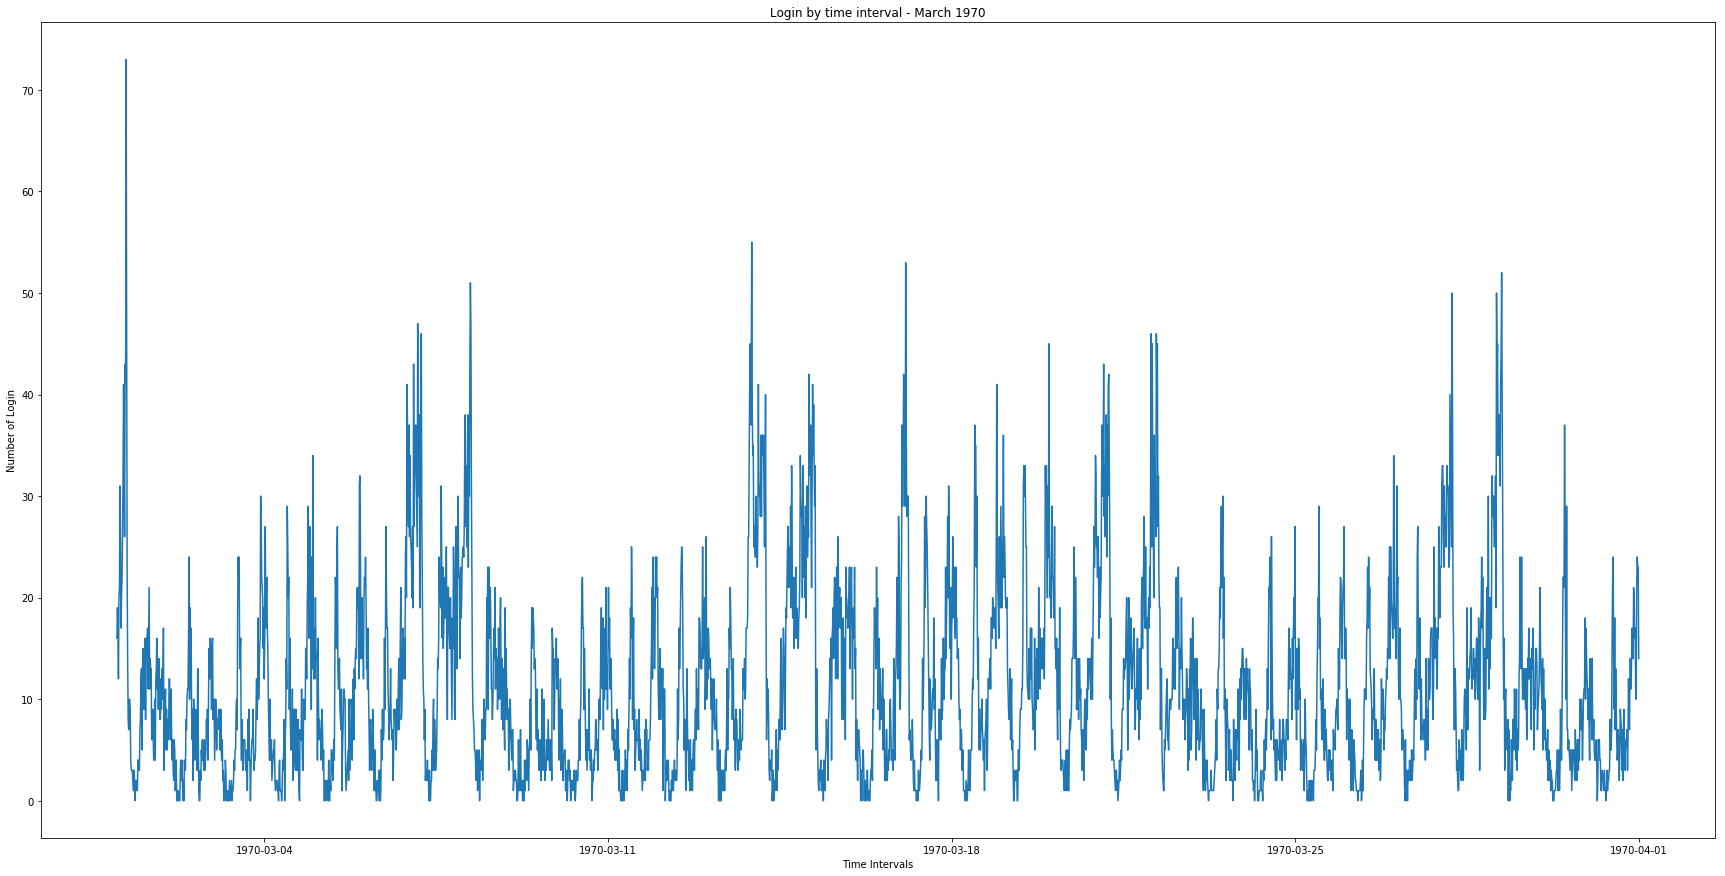

In [72]:
logins_df_mar = logins_df_mar.reset_index()
logins_df_mar.set_index('login_time', inplace=True)
logins_df_mar = logins_df_mar.resample('15T', how='sum')
fig, ax = plt.subplots(figsize = (30,15))
plt.xlabel('Time Intervals')
#plt.xticks(np.arange(20), result.index)
plt.ylabel('Number of Login')
plt.title('Login by time interval - March 1970')
plt.plot(logins_df_mar.index, logins_df_mar.login_count)


We do notice similar trends in February and March as well.

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


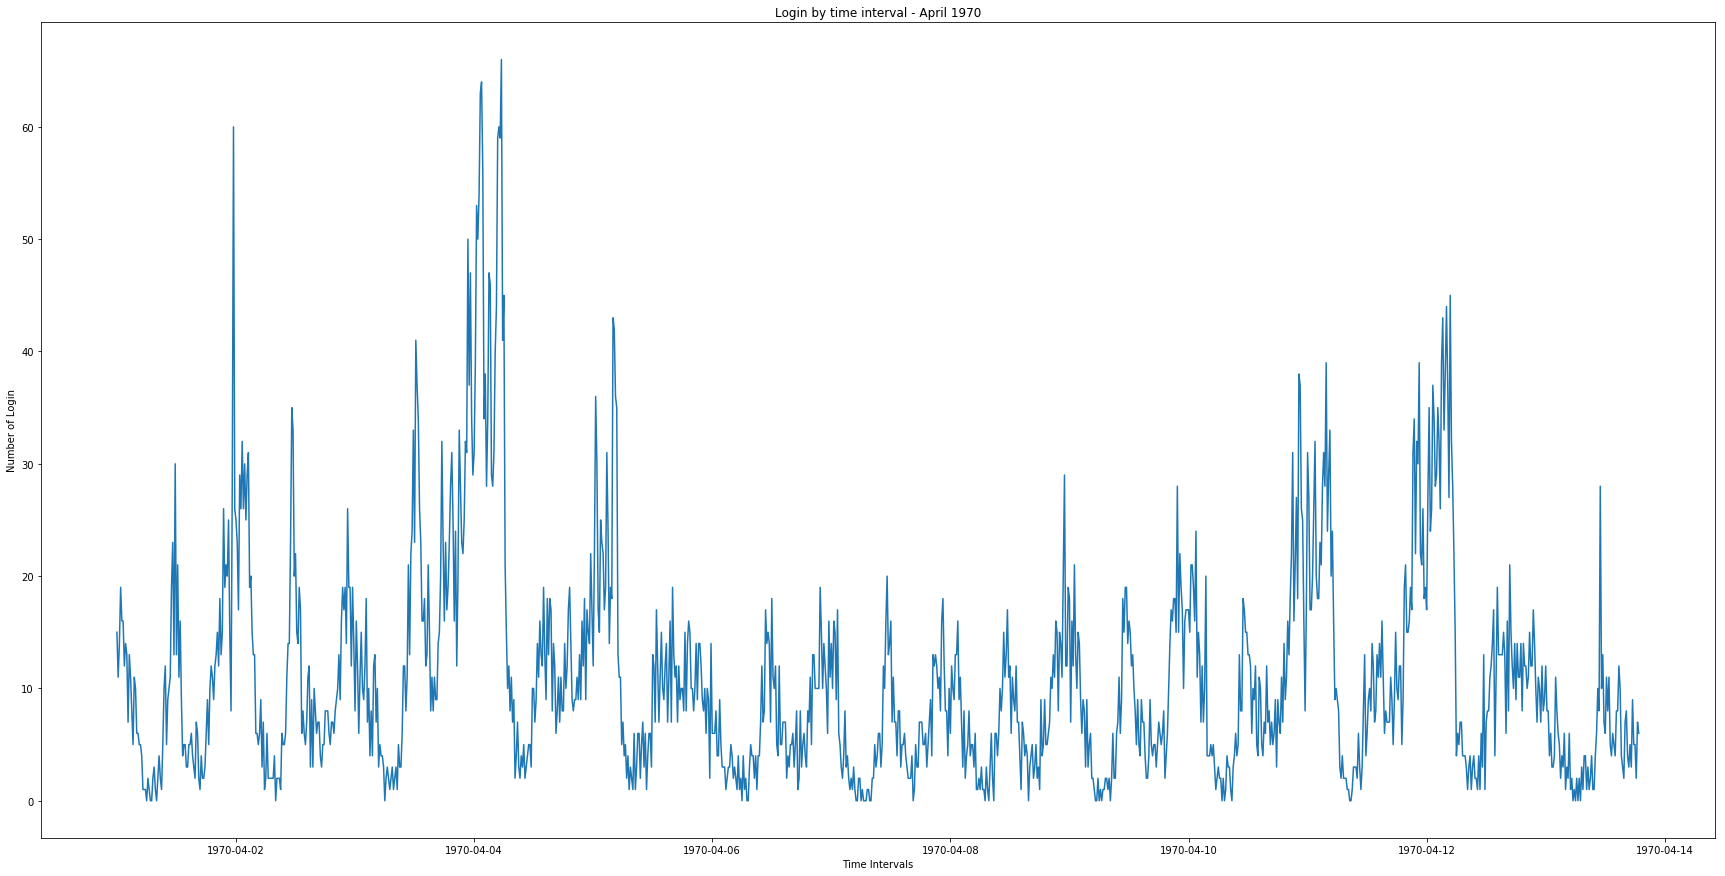

In [77]:
logins_df_apr = logins_df_apr.reset_index()
logins_df_apr.set_index('login_time', inplace=True)
logins_df_apr = logins_df_apr.resample('15T', how='sum')
fig, ax = plt.subplots(figsize = (30,15))
plt.xlabel('Time Intervals')
#plt.xticks(np.arange(20), result.index)
plt.ylabel('Number of Login')
plt.title('Login by time interval - April 1970')
plt.plot(logins_df_apr.index, logins_df_apr.login_count)


We have only 14 days of data for April so can't comment about the 2nd and third week of data trend.

In [91]:
logins_df = logins_df.reset_index()

In [92]:
#Checking the data from a different perspective
# by week
logins_df['weekday'] = logins_df[
    'login_time'].dt.dayofweek
logins_df.head(10)
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 3 columns):
login_time     93142 non-null datetime64[ns]
login_count    93142 non-null int64
weekday        93142 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 MB


In [85]:
logins_df = logins_df.drop_duplicates()
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 5 columns):
level_0        93142 non-null int64
index          93142 non-null int64
login_time     93142 non-null datetime64[ns]
login_count    93142 non-null int64
weekday        93142 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.3 MB


In [86]:
logins_df.head(10)

,level_0,index,login_time,login_count,weekday
0,0,0,1970-01-01 20:13:18,1,3
1,1,1,1970-01-01 20:16:10,1,3
2,2,2,1970-01-01 20:16:37,1,3
3,3,3,1970-01-01 20:16:36,1,3
4,4,4,1970-01-01 20:26:21,1,3
5,5,5,1970-01-01 20:21:41,1,3
6,6,6,1970-01-01 20:12:16,1,3
7,7,7,1970-01-01 20:35:47,1,3
8,8,8,1970-01-01 20:35:38,1,3
9,9,9,1970-01-01 20:47:52,1,3


In [94]:
wkday = logins_df.sort_values(by='count', ascending=False)
wkday_counts = wkday[['count', 'weekday']]
wkday_count = wkday_counts.groupby('weekday').sum().reset_index()
wkday_count

KeyError: 'count'

In [ ]:
df = df.drop_duplicates()
print(df)

In [99]:
daily_logins = logins_df.resample('H').sum()
# make a column that identify the day of week; Monday=0, Sunday=6
day_of_week = list(daily_logins.index.dayofweek)
daily_logins['day_of_week'] = day_of_week
# add column with just the hour (omiting the date)
daily_logins['hour'] = [time.hour for time in daily_logins.index]

In [100]:
# create dataframe of the average number of logins for each hour of each day
avg_hourly_logins = pd.pivot_table(daily_logins, values = 'login_count', index = 'hour', columns = 'day_of_week', aggfunc=np.mean).rename(columns= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
# stack
avg_hourly_logins = avg_hourly_logins.stack(level=['day_of_week'])
# name the stack
avg_hourly_logins.name = 'avg_num_logins'
avg_hourly_logins_df = avg_hourly_logins.reset_index()

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Average Logins per Hour')

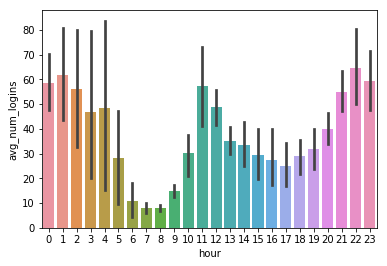

In [110]:
sns.barplot(x='hour', y='avg_num_logins', data=avg_hourly_logins_df)
ax.set_title('Average Logins per Hour', fontsize = 26)
ax.set_title('Average Logins per Hour', fontsize = 26)

It seems there is more traffic early morning or late night

In [64]:
#df = pd.DataFrame(np.random.rand(100,2), index=pd.date_range('1-1-2018', periods=100))
#fig, ax = plt.subplots(figsize = (30,15))
#ax.xaxis.set_major_locator(plt.IndexLocator())
#ax.xaxis.set_minor_locator(plt.IndexLocator())
#ax.xaxis.IndexLocator(mdates.MonthLocator())
#plt.show()

#### Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

The objective of Ultimate is to have more drive between the two cities i.e. more revenue for the company. I think the company 
wants to take advantage of the fact that both the cities are reasonably busy on the weekends.

I will use below metrics as a measure of success.

(1) Higher number of rides between the two cities especially through the toll bridge.

(2) Revenue generated should exceed the cost

Here, revenue will be coming from the incremental rides. Cost will include the toll of the bridge that is a new cost for
the company.

To compare the effective of the proposed change:
    
a. Experiment design - 

A simple A/B testing cab be designed for this purpose.

Let's say random set of drivers in set A will be reimbursed the toll and random set of drivers in B will not be reimbursed.

One other way to test this by reimbursin all the tolls on one weekend and not reimbursing the tolls on another
weekend.

b. Tracking the results

We can then use the test to see if there is a lift in our metrics and if the lift is significant. 




#### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).


In [162]:
#importing the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json

In [163]:
# loading the data
file = open('ultimate_data_challenge.json', 'r')
data_df = pd.DataFrame(json.load(file))
file.close()
data_df.head(5)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [164]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [165]:
#EDA
#checking for nulls

data_df.dropna()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
10,4.28,4.9,5.0,1.00,Winterfell,2014-05-30,iPhone,2014-01-13,0.0,1,True,100.0
11,3.81,5.0,4.0,1.00,Winterfell,2014-01-10,iPhone,2014-01-06,0.0,3,False,100.0


In [ ]:
# Lot of the rows are empty - 8555 rows are removed


In [166]:
# converting the objects to right datat type
data_df['last_trip_date'] = pd.to_datetime(data_df['last_trip_date'])
data_df['signup_date'] = pd.to_datetime(data_df['signup_date'])

In [147]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [138]:
data_df['city'].head(10)

0    0        King's Landing\n1               Astap...
1    0        King's Landing\n1               Astap...
2    0        King's Landing\n1               Astap...
3    0        King's Landing\n1               Astap...
4    0        King's Landing\n1               Astap...
5    0        King's Landing\n1               Astap...
6    0        King's Landing\n1               Astap...
7    0        King's Landing\n1               Astap...
8    0        King's Landing\n1               Astap...
9    0        King's Landing\n1               Astap...
Name: city, dtype: object

In [139]:
data_df['city'] = data_df['city'].astype('|S')

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


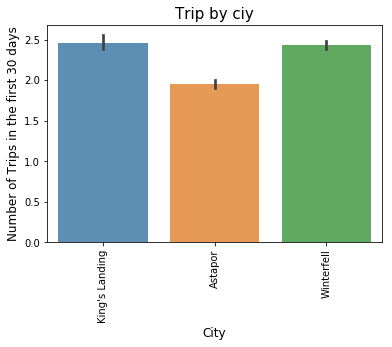

In [149]:
sns.barplot(data_df['city'], data_df['trips_in_first_30_days'], alpha=0.8)
plt.ylabel('Number of Trips in the first 30 days', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Trip by ciy', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

King's Landing and Winterfell have more no of trips in the last 30 days

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


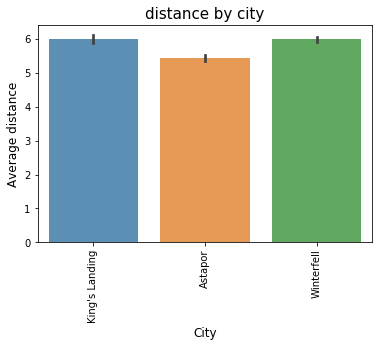

In [152]:
sns.barplot(data_df['city'], data_df['avg_dist'], alpha=0.8)
plt.ylabel('Average distance', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('distance by city', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

More trips, more distance 

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


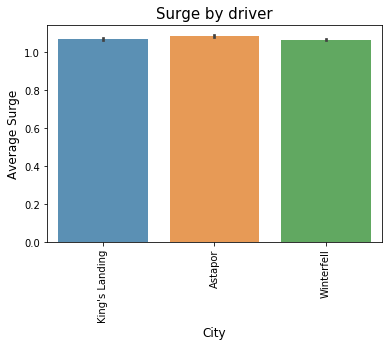

In [155]:
sns.barplot(data_df['city'], data_df['avg_surge'], alpha=0.8)
plt.ylabel('Average Surge', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Surge by driver', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

not much difference in the ratings by driver or average surge

##### Build a model

In [159]:
data_df_c = data_df

In [167]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [168]:
data_final_vars=[
 'avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'phone',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct'
]

In [169]:
data_df_c=data_df[data_final_vars]

In [170]:
data_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [171]:
data_df_c_enc = pd.get_dummies(data_df_c, columns = ['city', 'phone', 'ultimate_black_user'])
data_df_c_enc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [172]:
data_df_c_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                     50000 non-null float64
avg_rating_by_driver         49799 non-null float64
avg_rating_of_driver         41878 non-null float64
avg_surge                    50000 non-null float64
surge_pct                    50000 non-null float64
trips_in_first_30_days       50000 non-null int64
weekday_pct                  50000 non-null float64
city_Astapor                 50000 non-null uint8
city_King's Landing          50000 non-null uint8
city_Winterfell              50000 non-null uint8
phone_Android                50000 non-null uint8
phone_iPhone                 50000 non-null uint8
ultimate_black_user_False    50000 non-null uint8
ultimate_black_user_True     50000 non-null uint8
dtypes: float64(6), int64(1), uint8(7)
memory usage: 3.0 MB


In [175]:
# how to know if a user is active
# if user has taken trip in last 30 days 
data_df_c_enc['retained'] = np.nan
data_df_c_enc.loc[data_df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
data_df_c_enc.loc[data_df['last_trip_date'] < '2014-06-01', 'retained'] = 0

In [183]:
data_df_c_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                     50000 non-null float64
avg_rating_by_driver         49799 non-null float64
avg_rating_of_driver         41878 non-null float64
avg_surge                    50000 non-null float64
surge_pct                    50000 non-null float64
trips_in_first_30_days       50000 non-null int64
weekday_pct                  50000 non-null float64
city_Astapor                 50000 non-null uint8
city_King's Landing          50000 non-null uint8
city_Winterfell              50000 non-null uint8
phone_Android                50000 non-null uint8
phone_iPhone                 50000 non-null uint8
ultimate_black_user_False    50000 non-null uint8
ultimate_black_user_True     50000 non-null uint8
retained                     50000 non-null float64
dtypes: float64(7), int64(1), uint8(7)
memory usage: 3.4 MB


In [182]:
data_df_c_enc.rename(columns={'city_King''s Landing': 'city_Kings Landing'}, inplace=True)

In [246]:
data_f= data_df_c_enc.dropna()

In [247]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 15 columns):
avg_dist                     41744 non-null float64
avg_rating_by_driver         41744 non-null float64
avg_rating_of_driver         41744 non-null float64
avg_surge                    41744 non-null float64
surge_pct                    41744 non-null float64
trips_in_first_30_days       41744 non-null int64
weekday_pct                  41744 non-null float64
city_Astapor                 41744 non-null uint8
city_Kings Landing           41744 non-null uint8
city_Winterfell              41744 non-null uint8
phone_Android                41744 non-null uint8
phone_iPhone                 41744 non-null uint8
ultimate_black_user_False    41744 non-null uint8
ultimate_black_user_True     41744 non-null uint8
status                       41744 non-null float64
dtypes: float64(7), int64(1), uint8(7)
memory usage: 3.1 MB


In [186]:
data_df_c_enc.columns = ['avg_dist', 
                         'avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct','trips_in_first_30_days',
                         'weekday_pct','city_Astapor', 'city_Kings Landing','city_Winterfell', 'phone_Android', 'phone_iPhone',                 
                         'ultimate_black_user_False', 'ultimate_black_user_True','status'] 

In [253]:
cols=[
 'avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city_Astapor',                
 'city_Kings Landing',        
 'city_Winterfell',            
 'phone_Android',              
 'phone_iPhone',                 
 'ultimate_black_user_False',  
 'ultimate_black_user_True',     
 'surge_pct',
 'trips_in_first_30_days',
 'weekday_pct'
]

In [254]:
#trying the XGboost model
# define features and target
X_model = data_f[cols]
y_model = data_f.status


In [255]:
X_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 14 columns):
avg_dist                     41744 non-null float64
avg_rating_by_driver         41744 non-null float64
avg_rating_of_driver         41744 non-null float64
avg_surge                    41744 non-null float64
city_Astapor                 41744 non-null uint8
city_Kings Landing           41744 non-null uint8
city_Winterfell              41744 non-null uint8
phone_Android                41744 non-null uint8
phone_iPhone                 41744 non-null uint8
ultimate_black_user_False    41744 non-null uint8
ultimate_black_user_True     41744 non-null uint8
surge_pct                    41744 non-null float64
trips_in_first_30_days       41744 non-null int64
weekday_pct                  41744 non-null float64
dtypes: float64(6), int64(1), uint8(7)
memory usage: 2.8 MB


In [256]:
X_model.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_Astapor,city_Kings Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,surge_pct,trips_in_first_30_days,weekday_pct
0,3.67,5.0,4.7,1.10,0,1,0,0,1,0,1,15.4,4,46.2
1,8.26,5.0,5.0,1.00,1,0,0,1,0,1,0,0.0,0,50.0
2,0.77,5.0,4.3,1.00,1,0,0,0,1,1,0,0.0,3,100.0
3,2.36,4.9,4.6,1.14,0,1,0,0,1,0,1,20.0,9,80.0
4,3.13,4.9,4.4,1.19,0,0,1,1,0,1,0,11.8,14,82.4


In [238]:
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['avg_rating_of_driver'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['avg_dist'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['avg_rating_by_driver'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['avg_surge'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['city_Astapor'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['city_Kings Landing'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['city_Winterfell'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['phone_Android'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['phone_iPhone'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['ultimate_black_user_False'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['ultimate_black_user_True'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['surge_pct'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['trips_in_first_30_days'])]
# X1 = data_df_c_enc[np.isfinite(data_df_c_enc['weekday_pct'])]


In [206]:
X = X[~np.isnan(X)]
X = X[~pd.isnull(X)]

In [257]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model, test_size=0.3, random_state=123)

In [258]:
X_train.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_Astapor,city_Kings Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,surge_pct,trips_in_first_30_days,weekday_pct
44269,2.63,4.9,4.7,1.00,0,0,1,0,1,1,0,0.0,2,54.2
22809,6.56,5.0,5.0,1.13,1,0,0,1,0,1,0,50.0,2,100.0
35602,3.80,4.5,3.7,1.01,0,0,1,0,1,1,0,1.9,9,66.7
16699,5.47,5.0,4.3,1.15,0,1,0,0,1,1,0,20.0,2,80.0
24885,2.51,4.5,4.3,1.01,0,0,1,0,1,0,1,5.0,5,25.0
10842,2.58,4.8,4.9,1.06,1,0,0,0,1,1,0,6.2,5,75.3
25161,3.82,5.0,5.0,1.00,0,0,1,0,1,1,0,0.0,0,100.0
15872,5.48,4.4,5.0,1.00,0,0,1,0,1,0,1,0.0,2,57.1
46276,2.29,4.7,4.6,1.00,0,1,0,1,0,0,1,0.0,0,75.0
27786,19.08,5.0,5.0,1.00,1,0,0,1,0,1,0,0.0,1,100.0


In [259]:
#using random forest classifier
classifier = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=2)

Accuracy score [0.69067579 0.70242984 0.70054757 0.704141   0.70528838] 
Precision [0.6890437  0.71521036 0.70566038 0.70491803 0.71049383]
Recall [0.45239085 0.45965058 0.46672213 0.48294509 0.47878536]


Text(0.5,257.44,'Predicted label')

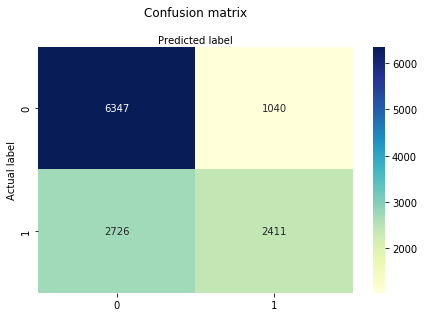

In [264]:
accuracy_score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
precision_score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
recall_score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Accuracy score {} '.format(accuracy_score))
print('Precision {}'.format(precision_score))
print('Recall {}'.format(recall_score))
          
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
    
#Confusion matrix
    
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
    
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [266]:
status = pd.DataFrame(y_train)
status.columns = ['status']
pd.concat([X_model, status],
          axis=1).corr().iloc[14].sort_values(
    ascending=False)

status                       1.000000
city_Kings Landing           0.260411
phone_iPhone                 0.231209
ultimate_black_user_True     0.218654
trips_in_first_30_days       0.197971
weekday_pct                  0.009663
surge_pct                    0.003747
avg_surge                   -0.011994
avg_rating_of_driver        -0.016306
avg_rating_by_driver        -0.038509
city_Winterfell             -0.039049
avg_dist                    -0.085475
city_Astapor                -0.184646
ultimate_black_user_False   -0.218654
phone_Android               -0.232096
Name: status, dtype: float64

##### Conclusion

For the prediction, mos relevant paramters are City - Kings Landing, whether the user has Android and Iphone or if the user is a black user.
Ultimate should see how they can increase the retainability of these users.